# Project 1 Report

## Arithmetic Intensity Warmup

Arithmetic intensity is the number of operations of a kernel $f(n)$ divided by the number of data items $n$. This follows the formula $\frac{f(n)}{n}$. For this exercise, we measure operations as FLOPs and we assume 8 bytes per floating point number. Additionally, we assume that scalars are loaded into the cache once and then are stored in registers for the remainder of the kernel operations.


| Kernel | Operations | Memory Accesses | Arithmetic Intensity |
| ----------- | ----------- | ----------- | ----------- |
| Y[j] += Y[j] + A[j][i] * B[i] | 2 FLOPs | 32 bytes | 0.0625 FLOPs/byte |
| s += A[i] * A[i] | 2 FLOPs | 8 bytes | 0.25 FLOPs/byte |
| s += A[i] * B[i] | 2 FLOPs | 16 bytes | 0.125 FLOPs/byte |
| Y[i] = A[i] + C*B[i] | 2 FLOPs | 24 bytes | 0.083 FLOPs/byte |

## Part 1: The Roofline Model

### 3. Roofline Models

For this question, the ERT was run in serial mode on three different architectures: Intel 16, Intel 18, and AMD 20. The resulting peak performances, memory bandwidths, and ridge points are displayed below.

| Model | Intel 16 | Intel 18 | AMD 20 |
| ----------- | ----------- | ----------- | ----------- |
| Peak Performance | 30.1 GFLOPs/sec | 43.0 GFLOPs/sec | 40.9 GFLOPs/sec |
| L1 Bandwidth | 171.1 GB/s | 226.2 GB/s | 209.4 GB/s |
| L2 Bandwidth | 112.5 GB/s | 166.7 GB/s | 43.6 GB/s |
| L3 Bandwidth | 72.0 GB/s | 77.8 GB/s | N/A |
| DRAM Bandwidth | 26.5 GB/s | 37.7 GB/s | 37.5 GB/s |
| Ridge Point | ~1.1 FLOPs/byte | ~1.1 FLOPs/byte | ~1.0 FLOPs/byte |

#### Intel 16 Roofline

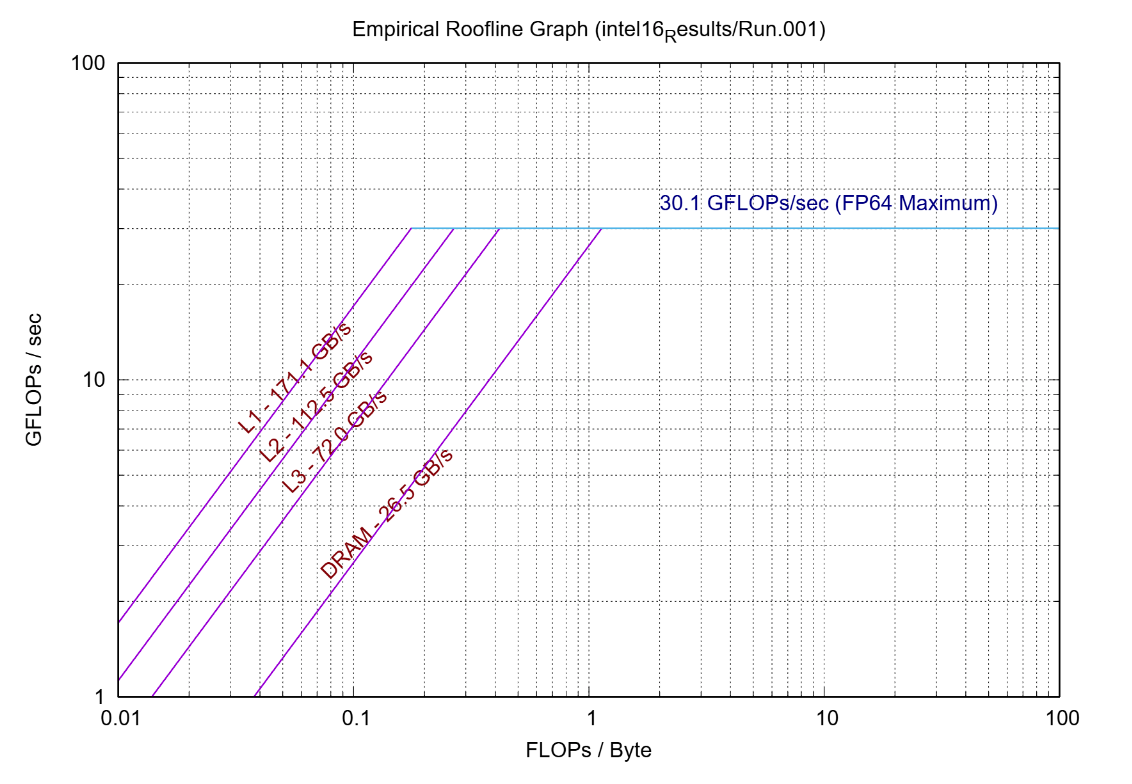

#### Intel 18 Roofline

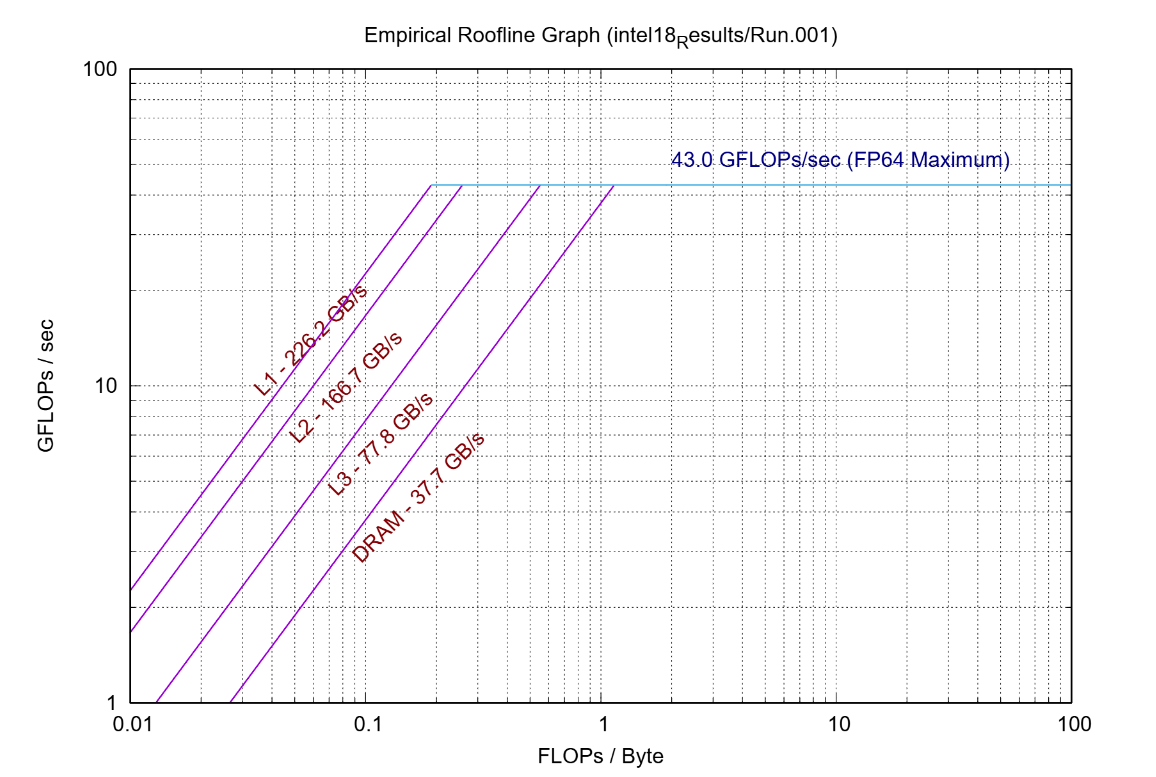

#### AMD 20 Roofline

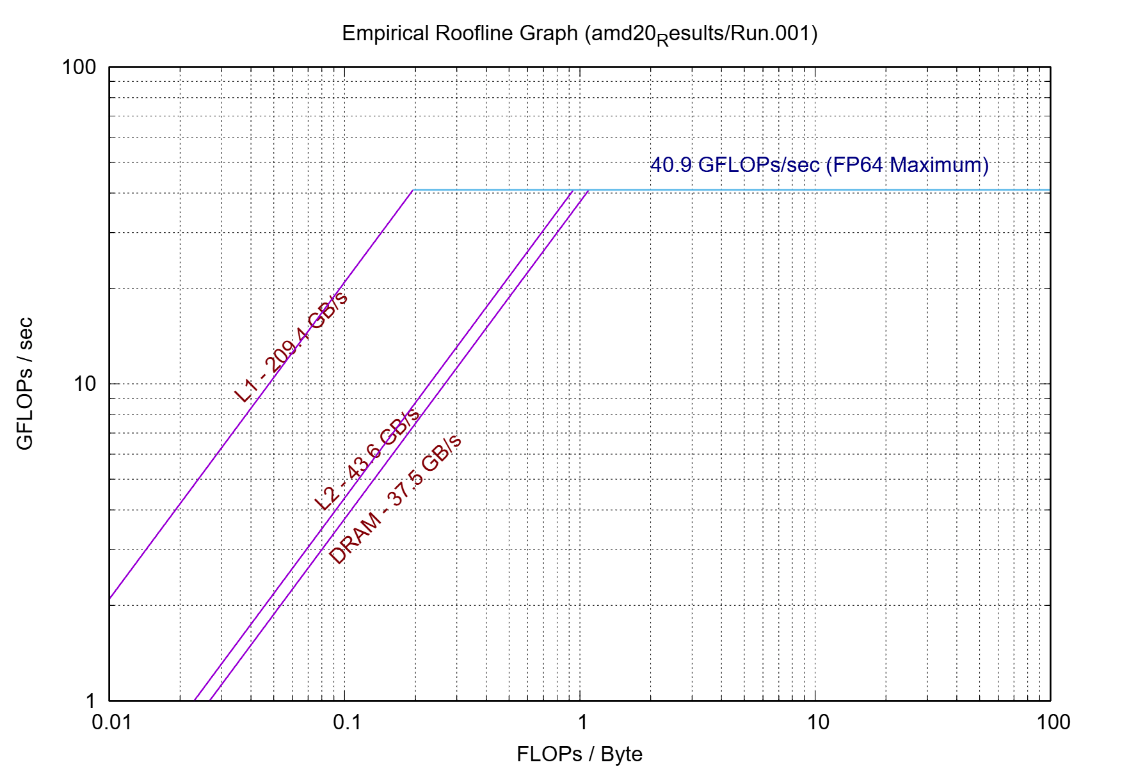

### 4. FP Kernels

This question considers the four FP kernels in "Roofline: An Insightful Visual Performance Model for Floating-Point Programs and Multicore Architectures". The tables below shows the expected performance of these kernels on the Intel 16, Intel 18, and AMD 20 architectures. The high end arithmetic intensity of each kernel is used to find the GFLOPs/sec at each memory level.

#### Results: amd20
| Kernel | Arithmetic Intensity | L1 | L2 | DRAM |
| -------- | -------- | -------- | -------- | --------- |
| SpMV | 0.25 FLOPs/byte | 40.9 GFLOPs/sec | 11.0 GFLOPs/sec | 9.0 GFLOPs/sec |
| LBMHD | 1.07 FLOPs/byte | 40.9 GFLOPs/sec | 40.9 GFLOPs/sec | 40.9 GFLOPs/sec |
| Stencil | 0.5 FLOPs/byte | 40.9 GFLOPs/sec | 22.0 GFLOPs/sec | 19.0 GFLOPs/sec |
| 3-D FFT | 1.64 FLOPs/byte | 40.9 GFLOPs/sec | 40.9 GFLOPs/sec | 40.9 GFLOPs/sec |

#### Results: intel16
| Kernel | Arithmetic Intensity | L1 | L2 | L3 | DRAM |
| -------- | -------- | -------- | -------- | --------- | ------- | 
| SpMV | 0.25 FLOPs/byte | 30.1 GFLOPs/sec | 30.1 GFLOPs/sec | 18.0 GFLOPs/sec | 6.5 GFLOPs/sec |
| LBMHD | 1.07 FLOPs/byte | 30.1 GFLOPs/sec | 30.1 GFLOPs/sec | 30.1 GFLOPs/sec | 30.1 GFLOPs/sec |
| Stencil | 0.5 FLOPs/byte | 30.1 GFLOPs/sec | 30.1 GFLOPs/sec | 30.1 GFLOPs/sec | 14.0 GFLOPs/sec |
| 3-D FFT | 1.64 FLOPs/byte | 30.1 GFLOPs/sec | 30.1 GFLOPs/sec | 30.1 GFLOPs/sec | 30.1 GFLOPs/sec |

#### Results: intel18
| Kernel | Arithmetic Intensity | L1 | L2 | L3 | DRAM |
| -------- | -------- | -------- | -------- | --------- | ------- |
| SpMV | 0.25 FLOPs/byte | 43.0 GFLOPs/sec | 43.0 GFLOPs/sec | 18.0 GFLOPs/sec | 9.0 GFLOPs/sec |
| LBMHD | 1.07 FLOPs/byte | 43.0 GFLOPs/sec | 43.0 GFLOPs/sec | 43.0 GFLOPs/sec | 43.0 GFLOPs/sec |
| Stencil | 0.5 FLOPs/byte | 43.0 GFLOPs/sec | 43.0 GFLOPs/sec | 40.0 GFLOPs/sec | 19.0 GFLOPs/sec |
| 3-D FFT | 1.64 FLOPs/byte | 43.0 GFLOPs/sec | 43.0 GFLOPs/sec | 43.0 GFLOPs/sec | 43.0 GFLOPs/sec |

From the results obtained above, we can see that the kernels follow specific trends regardless of the system architecture. The LBMHD and 3-D FFT have arithmetic intensities greater than 1, meaning that they have more operations compared to data movements. This results in them reaching the peak performance of each compute node regardless of the data size, meaning that these two kernels are CPU-bound.

The SpMV and Stencil kernels show different results. This is because of their arithmetic intensity being lower than 1, which means that they have more data movements than operations. For the L1 cache in all 3 architectures, these kernels are CPU-bound. The same holds true for the L2 caches of the 2 Intel nodes. Once these kernels reach the L3 cache and DRAM of the Intel nodes, they become memory-bound because they cannot achieve peak performance (except for Stencil in the Intel 16 L3 cache, which remains CPU-bound). The AMD node differs from the Intel nodes as there are only 2 cache levels. Both kernels become memory-bound in the L2 and DRAM of the AMD 20 node.

#### Optimization Strategies:

- LBMHD and 3-D FFT: Since these kernels are CPU-bound, the optimization strategies involve improving the parallelism of the code. This can take the form of vectorization, parallelization, or other parallel techniques. 

- SpMV and Stencil: The optimization strategies for these kernels will focus on smaller sized operations, as these are memory-bound. These strategies attempt to limit the number of data movement operations for the kernels. The first strategy is to improve cache reuse with techniques such as loop tiling or blocking techniques. The second strategy involves optimizing the data structures of the kernels to reduce their memory footprint.

### 5. Warm Up Kernels

This question addresses the same questions as 4, but instead uses the kernels from the warm up exercise. We again show the expected performance of these kernels on the Intel 16, Intel 18, and AMD 20 architectures. The GFLOPs/sec at each memory level is again recorded for each calculated arithmetic intensity.

#### Results: amd20
| Kernel | Arithmetic Intensity | L1 | L2 | DRAM |
| -------- | -------- | -------- | -------- | --------- | 
| Y[j] += Y[j] + A[j][i] * B[i] | 0.0625 FLOPs/byte | 14 GFLOPs/sec | 2.6 GFLOPs/sec | 2.3 GFLOPs/sec |
| s += A[i] * A[i] | 0.25 FLOPs/byte | 40.9 GFLOPs/sec | 10.2 GFLOPs/sec | 9 GFLOPs/sec |
| s += A[i] * B[i] | 0.125 FLOPs/byte | 23 GFLOPs/sec | 5.1 GFLOPs/sec | 4.4 GFLOPs/sec |
| Y[i] = A[i] + C*B[i] | 0.083 FLOPs/byte | 18 GFLOPs/sec | 3.5 GFLOPs/sec | 3 GFLOPs/sec |

#### Results: intel16
| Kernel | Arithmetic Intensity | L1 | L2 | L3 | DRAM |
| -------- | -------- | -------- | -------- | --------- | ------- | 
| Y[j] += Y[j] + A[j][i] * B[i] | 0.0625 FLOPs/byte | 10.05 GFLOPs/sec | 7 GFLOPs/sec | 4.5 GFLOPs/sec | 1.6 GFLOPs/sec |
| s += A[i] * A[i] | 0.25 FLOPs/byte | 30.1 GFLOPs/sec | 26 GFLOPs/sec | 16 GFLOPs/sec | 6.5 GFLOPs/sec |
| s += A[i] * B[i] | 0.125 FLOPs/byte | 20 GFLOPs/sec | 13 GFLOPs/sec | 8.5 GFLOPs/sec | 3.1 GFLOPs/sec |
| Y[i] = A[i] + C*B[i] | 0.083 FLOPs/byte | 15 GFLOPs/sec | 9 GFLOPs/sec | 6 GFLOPs/sec | 2.1 GFLOPs/sec |

#### Results: intel18
| Kernel | Arithmetic Intensity | L1 | L2 | L3 | DRAM |
| -------- | -------- | -------- | -------- | --------- | ------- | 
| Y[j] += Y[j] + A[j][i] * B[i] | 0.0625 FLOPs/byte | 15 GFLOPs/sec | 10 GFLOPs/sec | 4.6 GFLOPs/sec | 1.3 GFLOPs/sec |
| s += A[i] * A[i] | 0.25 FLOPs/byte | 43 GFLOPs/sec | 43 GFLOPs/sec | 20 GFLOPs/sec | 9 GFLOPs/sec |
| s += A[i] * B[i] | 0.125 FLOPs/byte | 26 GFLOPs/sec | 20 GFLOPs/sec | 9 GFLOPs/sec | 4.5 GFLOPs/sec |
| Y[i] = A[i] + C*B[i] | 0.083 FLOPs/byte | 19 GFLOPs/sec | 14 GFLOPs/sec | 6.1 GFLOPs/sec | 3 GFLOPs/sec |

The majority of the Kernel's arithmetic intensities result in a GFLOPs/sec which is lower than the maximum value avalible. the max value is only reached once in amd20 with s += A[i] * A[i] and twice in intel18 also with s += A[i] * A[i]. So as expected the results from the warmups remain consitant when plotted onto the kerna platforms we were testing. 

Other than a couple spikes and dips the majority of the intensities used from the warmup were similar inputs and resulted in an output that was not too far off the other equivlent values. 

#### Optimization Strategies:

 potential paths of optimization for this kernel fetching could include improving memory access patters to boost the bandwidth of DRAM which would improve the performance overall, this could mean reducing access to DRAM memory attached to the other socket. Another option is kernel fusion which would reduce memory request from conflicting and might help close the gap between GRAM and the cache performance. 

## Part 2: Enter the Agoge

The agoge EulerSolver and GravitySolver were profiled using VTune, and the arithmetic intensity of each problem size (from 32 up to 512) is shown in the table below.  

Arithmetic intensity is defined as: $$ \text{AI} = \frac{\text{FLOPs/s}}{\text{Memory Traffic (Bytes/s)}} $$

The DP GFLOPs were divided by the average DRAM bandwidth to find the arithmetic intesity of each problem size for each solver. 


### Arithmetic Intensity
| Prblem Size | EulerSolver | GravitySolver |
| ----------- | ----------- | ----------- |
| 32^3 | 0 FLOPs/Byte | 0 FLOPs/Byte |
| 64^3 | 0.17 FLOPs/Byte | 1.03 FLOPs/Byte |
| 128^3 | 0.20 FLOPs/Byte | 0.77 FLOPs/Byte |
| 256^3 | 0.20 FLOPs/Byte | 0.46 FLOPs/Byte |
| 512^3 | 0.14 FLOPs/Byte | 0.37 FLOPs/Byte |

As shown above, the EulerSolver stays fairly consistent with the arithmetic intensity, whereas the GravitySolver's AI steadily decreases as the problem size increases. The performance of the solvers for each problem size in the context of the roofline model for Intel 18 is shown below.  

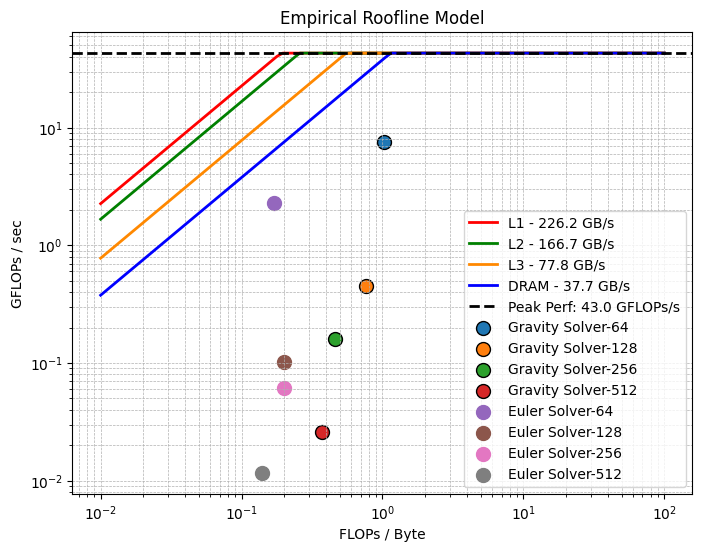